In [80]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import matplotlib
matplotlib.rcParams["axes.formatter.useoffset"] = False
matplotlib.rc('text', usetex=False)


#import scipy.io
#import scipy.sparse

import scanpy as sc

from functools import partial
from copy import deepcopy
from time import time

#!git clone --depth=1 https://github.com/rapolaszilionis/utility_functions
import sys
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz


from seaborn import FacetGrid, kdeplot
#!{sys.executable} -m pip install scanpy[louvain]

In [2]:
# import sys #==1.4.4.post1
# !{sys.executable} -m pip install scanpy
# #!{sys.executable} -m y
# #!{sys.executable} -m pip install scanpy

In [3]:
!python --version
print(np.__version__)
print(sc.__version__)
#print(scipy.__version__)

Python 3.6.10
1.18.2
1.4.6


In [4]:
# folder = '/home/ng136/pittet/seq_archive/18_12_28_RZ_imm_ther_side_eff_Marie/count_data/{}/Solo.out/Gene/raw/'
# batch='pool1'

# adata = sc.read_mtx(folder.format(batch)+'matrix.mtx')
# adata = adata.transpose()
# adata.obs['barcodes'] = pd.read_csv(folder.format(batch)+'barcodes.tsv', sep = '\t', header = None).values
# adata.var_names = pd.read_csv(folder.format(batch)+'features.tsv', sep = '\t', header = None)[0].values


In [2]:
#to make this list from library_dict:
    #{k:(250, 0.15) for k in sum([list(x.values()) for x in library_dict.values()],[])}
    
    
# threshold of counts, max mitochondrial fraction
filter_dict = {  'Liver_CD45pos_NT_A': (200, 0.15),
                 'Liver_CD45pos_NT_B': (200, 0.15),
                 'Liver_CD45pos_Trx_A': (200, 0.15),
                 'Liver_CD45pos_Trx_B': (200, 0.15),
                 'Tumor_CD45pos_NT_A': (200, 0.15),
                 'Tumor_CD45pos_NT_B': (200, 0.15),
                 'Tumor_CD45pos_Trx_A': (250, 0.15),
                 'Tumor_CD45pos_Trx_B': (250, 0.15),
                 'Liver_CD45pos_NT_C': (250, 0.15),
                 'Liver_CD45pos_NT_D': (250, 0.15),
                 'Liver_CD45pos_Trx_C': (300, 0.15),
                 'Liver_CD45pos_Trx_D': (250, 0.15),
                 'Tumor_CD45pos_NT_C': (250, 0.15),
                 'Tumor_CD45pos_NT_D': (200, 0.15),
                 'Tumor_CD45pos_Trx_C': (250, 0.15),
                 'Tumor_CD45pos_Trx_D': (250, 0.15),
                 'Liver_CD45pos_NT_E': (300, 0.15),
                 'Liver_CD45pos_NT_G': (300, 0.15),
                 'Liver_CD45pos_Trx_E': (250, 0.15),
                 'Liver_CD45pos_Trx_G': (300, 0.15),
                 'Tumor_CD45pos_Trx_E': (275, 0.15),
                 'Tumor_CD45pos_Trx_G': (180, 0.15),
                 'Liver_CD45pos_Trx_H': (250, 0.15),
                 'Liver_CD45pos_NT_F': (300, 0.15),
                 'Liver_CD45pos_NT_H': (300, 0.15),
                 'Tumor_CD45pos_Trx_F': (300, 0.15),
                 'Liver_CD45pos_Trx_F': (300, 0.15),
                 'Tumor_CD45pos_Trx_H': (400, 0.15),
                 'Liver_IL12_Trx_I_rep1': (400, 0.15),
                 'Liver_IL12_Trx_J_rep1': (200, 0.15),
                 'Tumor_IL12_Trx_I_rep1': (150, 0.15),
                 'Tumor_IL12_Trx_J_rep1': (250, 0.15),
                 'Liver_IL12_Trx_I_rep2': (300, 0.15),
                 'Liver_IL12_Trx_J_rep2': (250, 0.15),
                 'Liver_IL12_Trx_K': (400, 0.15),
                 'Tumor_IL12_Trx_I_rep2': (300, 0.15),
                 'Tumor_IL12_Trx_J_rep2': (150, 0.12),
                 'Tumor_IL12_Trx_K': (120, 0.15)}

In [3]:
library_dict_pool1 = {  'ATAGAGAG' : 'Liver_CD45pos_NT_A',
                        'AGAGGATA' : 'Liver_CD45pos_NT_B' ,
                        'TACTCCTT' : 'Liver_CD45pos_Trx_A',
                        'AGGCTTAG' : 'Liver_CD45pos_Trx_B',
                        'CTTAATAG' : 'Tumor_CD45pos_NT_A',
                        'ATAGCCTT' : 'Tumor_CD45pos_NT_B',
                        'CTAGTCGA' : 'Tumor_CD45pos_Trx_A',
                        'AGCTAGAA' : 'Tumor_CD45pos_Trx_B'}

library_dict_pool2 = {  'CTCCTTAC' : 'Liver_CD45pos_NT_C',
                        'TATGCAGT' : 'Liver_CD45pos_NT_D' ,
                        'ATTAGACG' : 'Liver_CD45pos_Trx_C',
                        'CGGAGAGA' : 'Liver_CD45pos_Trx_D',
                        'TAAGGCTC' : 'Tumor_CD45pos_NT_C',
                        'TCGCATAA' : 'Tumor_CD45pos_NT_D',
                        'ACTCTAGG' : 'Tumor_CD45pos_Trx_C',
                        'TCTTACGC' : 'Tumor_CD45pos_Trx_D'}

library_dict_pool3 = {  'TTACCTCC' : 'Liver_CD45pos_NT_E',
                        'CCTTTACT' : 'Liver_CD45pos_NT_G' ,
                        'AGAAAGCT' : 'Liver_CD45pos_Trx_E',
                        'CGCATTCT' : 'Liver_CD45pos_Trx_G',
                        'GAGACGGA' : 'Tumor_CD45pos_Trx_E',
                        'ACGCTCTT' : 'Tumor_CD45pos_Trx_G'}

library_dict_pool4 = {  'ATAGAGAG' : 'Liver_CD45pos_Trx_H',
                        'CAGTTATG' : 'Liver_CD45pos_NT_F' ,
                        'GAGACGGA' : 'Liver_CD45pos_NT_H' ,
                        'AGAAAGCT' : 'Tumor_CD45pos_Trx_F',
                        'ACGCTCTT' : 'Liver_CD45pos_Trx_F',
                        'CGCATTCT' : 'Tumor_CD45pos_Trx_H'}

library_dict_pool5 = {  'ATAGAGAG' : 'Liver_IL12_Trx_I_rep1',
                        'AGAGGATA' : 'Liver_IL12_Trx_J_rep1' ,
                        'CTCCTTAC' : 'Tumor_IL12_Trx_I_rep1' ,
                        'TATGCAGT' : 'Tumor_IL12_Trx_J_rep1',
                        'TACTCCTT' : 'Liver_IL12_Trx_I_rep2',
                        'AGGCTTAG' : 'Liver_IL12_Trx_J_rep2',
                        'ATTAGACG' : 'Liver_IL12_Trx_K',
                        'CGGAGAGA' : 'Tumor_IL12_Trx_I_rep2',
                        'ACTCTAGG' : 'Tumor_IL12_Trx_J_rep2',
                        'TCTTACGC' : 'Tumor_IL12_Trx_K'}

library_dict = {'pool1' : library_dict_pool1,
                'pool2' : library_dict_pool2,
                'pool3' : library_dict_pool3,
                'pool4' : library_dict_pool4,
                'pool5' : library_dict_pool5}


def map_library_bc(bc,pool): 
    return library_dict[pool][bc[8:16]]

In [4]:
folder = '/home/ng136/pittet/seq_archive/18_12_28_RZ_imm_ther_side_eff_Marie/count_data/{}/Solo.out/Gene/raw/'
batches = ['pool1', 'pool2', 'pool3', 'pool4', 'pool5']

In [5]:
adict = {}

for batch in batches:
    genes_df = pd.read_csv(folder.format(batch)+'features.tsv',sep='\t', names=['ensembl','name'])
    barcodes_df = pd.read_csv(folder.format(batch)+'barcodes.tsv',sep='\t', names=['barcode'])
    
    
    #adict[batch] = sc.read_mtx(folder.format(batch)+'matrix_dense_T.mtx')
    adict[batch] = sc.read_mtx(folder.format(batch)+'matrix.mtx')
    adict[batch] = adict[batch].transpose()
    #adict[batch] = sc.AnnData(X=scipy.io.mmread(folder.format(batch)+'matrix.mtx').T)
    
    adict[batch].var_names = genes_df.loc[:, 'name']
    adict[batch].var_names_make_unique()
    
    #set initial guess for minimum total counts / max mitochondrial ratio
    #adict[batch].uns['min_tot'] = 250
    #adict[batch].uns['max_mt'] = 0.15
    
    adict[batch].obs['barcode'] = barcodes_df.loc[:,'barcode'].values
    adict[batch].obs['library_name'] = adict[batch].obs.barcode.apply(partial(map_library_bc, pool=batch))
    
    mito_genes = adict[batch].var_names.str.startswith('mt-')
    sc.pp.filter_cells(adict[batch], min_genes=10)
    
    adict[batch].obs['n_counts'] = adict[batch].X.sum(1).A1
    adict[batch].obs['mito_frac'] = adict[batch].X[:,mito_genes].sum(1).A1 / adict[batch].obs['n_counts']
    
    adict[batch].obs[['tissue', 'marker', 'treatment', 'group']] = adict[batch].obs.library_name.str.split('_', n=3, expand=True)
    adict[batch].obs['pool'] = batch
    
    adict[batch].obs[['min_tot', 'max_mt']] = pd.DataFrame(adict[batch].obs.library_name.map(filter_dict).tolist(), index=adict[batch].obs.index)

    
#sc.pp.calculate_qc_metrics(adict['pool1'])    

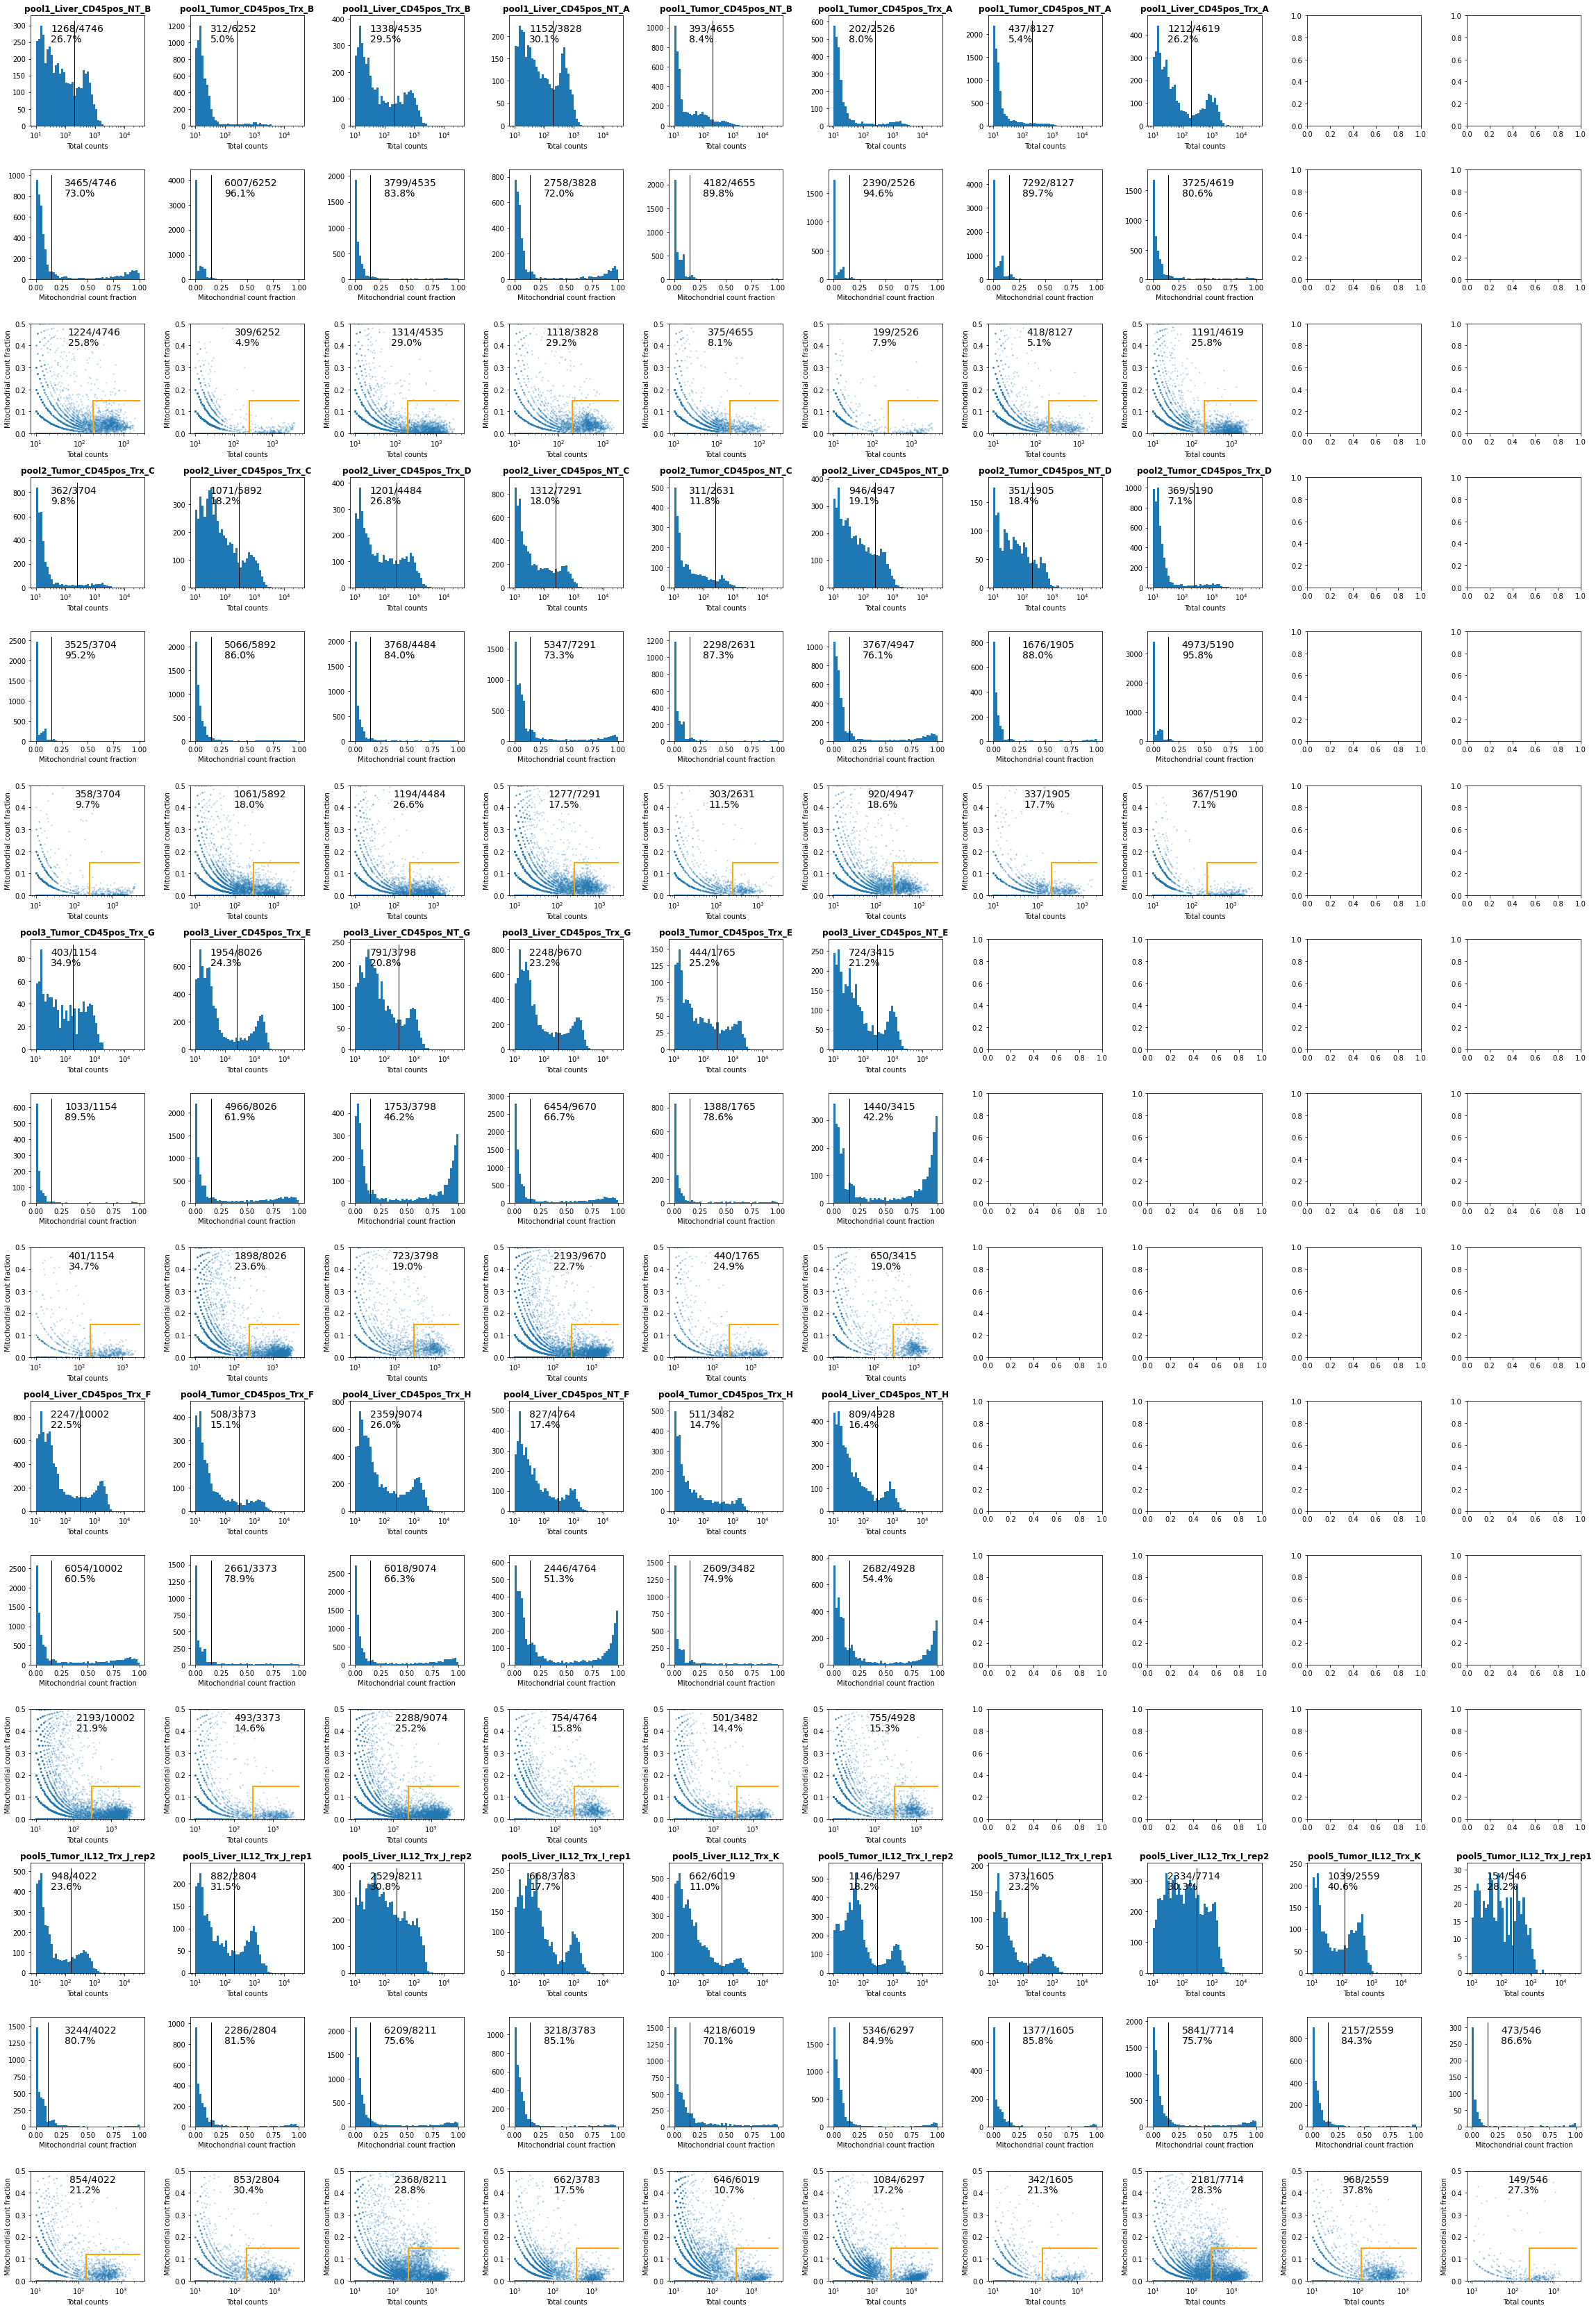

In [9]:
#wrap it into a function and have plots of the filtered data as part of the notebook


n_conditions_per_row = 10

fig, axes = plt.subplots(3*len(adict.keys()), n_conditions_per_row, figsize=(4*n_conditions_per_row,12*len(adict.keys())))

batch_index = 0
for k in batches:

    #set barcode from file and match to respective library name
    
        #should I apply these filters?????
    #initial filter for mitochondrial fraction to be even computable
    #sc.pp.filter_cells(adict[batch], min_genes=10)
    #sc.pp.filter_genes(adict[batch], min_cells=3)

    
    # np.matrix.A1 is equivalent to np.matrix.asarray().flatten()
    #set observation annotation 'n_counts' as the (aggregated) sum over all genes for each observation/cell
    
    # for each sample, add the guessed total minimum as a global variable
    #min_tot = adict[k].uns['min_tot']
    #max_mt = adict[k].uns['max_mt']
    
    
    
    #plot histogram of n_counts per...
    
    for ax_col, condition in enumerate(adict[k].obs['library_name'].unique()):
        
        ##FIRST RUN: use default thresholds
        #min_tot = adict[k].uns['min_tot']
        #max_mt = adict[k].uns['max_mt']
        
        #SECOND RUN: set manual thresholds
        min_tot, max_mt = filter_dict[condition]
        
        ax_row = batch_index*3
        
        #add percentage of mitochondrial genes as an annotation
        
        obs_condition = adict[k].obs.query('library_name == {}'.format('"{}"'.format(condition)))
                        
        #
        #histogram 1
        #
        
        axes[ax_row, ax_col].hist(obs_condition.loc[:,'n_counts'], np.logspace(1, 4.5, 50))
        axes[ax_row, ax_col].set_xscale('log')
        axes[ax_row, ax_col].set_xlabel('Total counts')


        # set x1, y1 as lists containing the respective min, max for each axis as shown in the figure
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        

        #plot a line that goes from y_min to y_max at x = min_tot, where min_tot is the previously guessed universal minimum
        axes[ax_row, ax_col].plot([min_tot, min_tot], yl, c='black', linewidth=1)    

        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum(obs_condition.loc[:,'n_counts'] >= min_tot)

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + 10**(np.log10(xl.ptp())*0.3), yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + 10**(np.log10(xl.ptp())*0.3), yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)
    
    
        axes[ax_row, ax_col].set_title(k+'_'+condition, fontweight='bold')
        
        
        ax_row += 1
        
        
                #
        #histogram 2
        #
        
        axes[ax_row, ax_col].hist(obs_condition.loc[:,'mito_frac'], np.linspace(0, 1, 50))
        axes[ax_row, ax_col].set_xlabel('Mitochondrial count fraction')


        # set x1, y1 as lists containing the respective min, max for each axis as shown in the figure
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        

        #plot a line that goes from y_min to y_max at x = min_tot, where min_tot is the previously guessed universal minimum
        axes[ax_row, ax_col].plot([max_mt, max_mt], yl, c='black', linewidth=1)    

        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum(obs_condition.loc[:,'mito_frac'] <= max_mt)

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.3, yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.3, yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)
        
        ax_row += 1
        
        
        #scatter plot
        
        axes[ax_row, ax_col].scatter(obs_condition.loc[:,'n_counts'], obs_condition.loc[:,'mito_frac'], alpha=0.2, s = 2)
        
        axes[ax_row, ax_col].set_xscale('log')
        axes[ax_row, ax_col].set_ylim([0,0.5])
        axes[ax_row, ax_col].set_xlabel('Total counts')
        axes[ax_row, ax_col].set_ylabel('Mitochondrial count fraction')
        
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        
        
        axes[ax_row, ax_col].plot([min_tot, xl[1]], [max_mt, max_mt], c='orange', linewidth=2)    
        axes[ax_row, ax_col].plot([min_tot, min_tot], [yl[0], max_mt], c='orange', linewidth=2)    

        
        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum((obs_condition.loc[:,'mito_frac'] <= max_mt ) & (obs_condition.loc[:,'n_counts'] >= min_tot))

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.02, yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.02, yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)

    batch_index += 1    

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Apply mitochondrial/UMI filters

In [6]:
fdict = {}

for k,v in adict.items():    
    fdict[k] = adict[k][(adict[k].obs['mito_frac'] <= adict[k].obs['max_mt'])  & (adict[k].obs['n_counts'] >= adict[k].obs['min_tot'])]

# Post-filtering Quality check

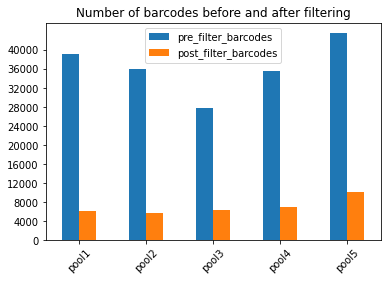

In [34]:
pd.DataFrame({'pre_filter_barcodes' : [adict[batch].X.shape[0] for batch in batches],
'post_filter_barcodes' : [fdict[batch].X.shape[0] for batch in batches]}, index=batches).plot.bar(rot=45)

plt.gca().set_yticks(np.linspace(0,40000, 11))
plt.gca().set_title('Number of barcodes before and after filtering')
plt.show()

In [21]:
#pd.DataFrame({'pre_filter_barcodes' : [adict[batch].X.shape[0] for batch in batches],
#'post_filter_barcodes' : [fdict[batch].X.shape[0] for batch in batches]}, index=batches)

,pre_filter_barcodes,post_filter_barcodes
pool1,5350251.0,4241545.0
pool2,5452816.0,4086296.0
pool3,8154408.0,7030350.0
pool4,9388693.0,7955269.0
pool5,10868347.0,8694951.0


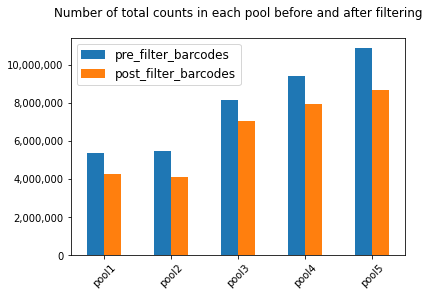

In [134]:
pd.DataFrame({'pre_filter_barcodes' : [adict[batch].X.sum(1).sum() for batch in batches],
'post_filter_barcodes' : [fdict[batch].X.sum(1).sum() for batch in batches]}, index=batches).plot.bar(rot=45)


#plt.gcf().set_figsize((16,16))
#plt.gca().set_yticks(np.linspace(0,1.5e7, 11))
plt.gca().set_title('Number of total counts in each pool before and after filtering\n')
plt.legend(fontsize=12)
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

# Total counts across libraries (before and after filtering)

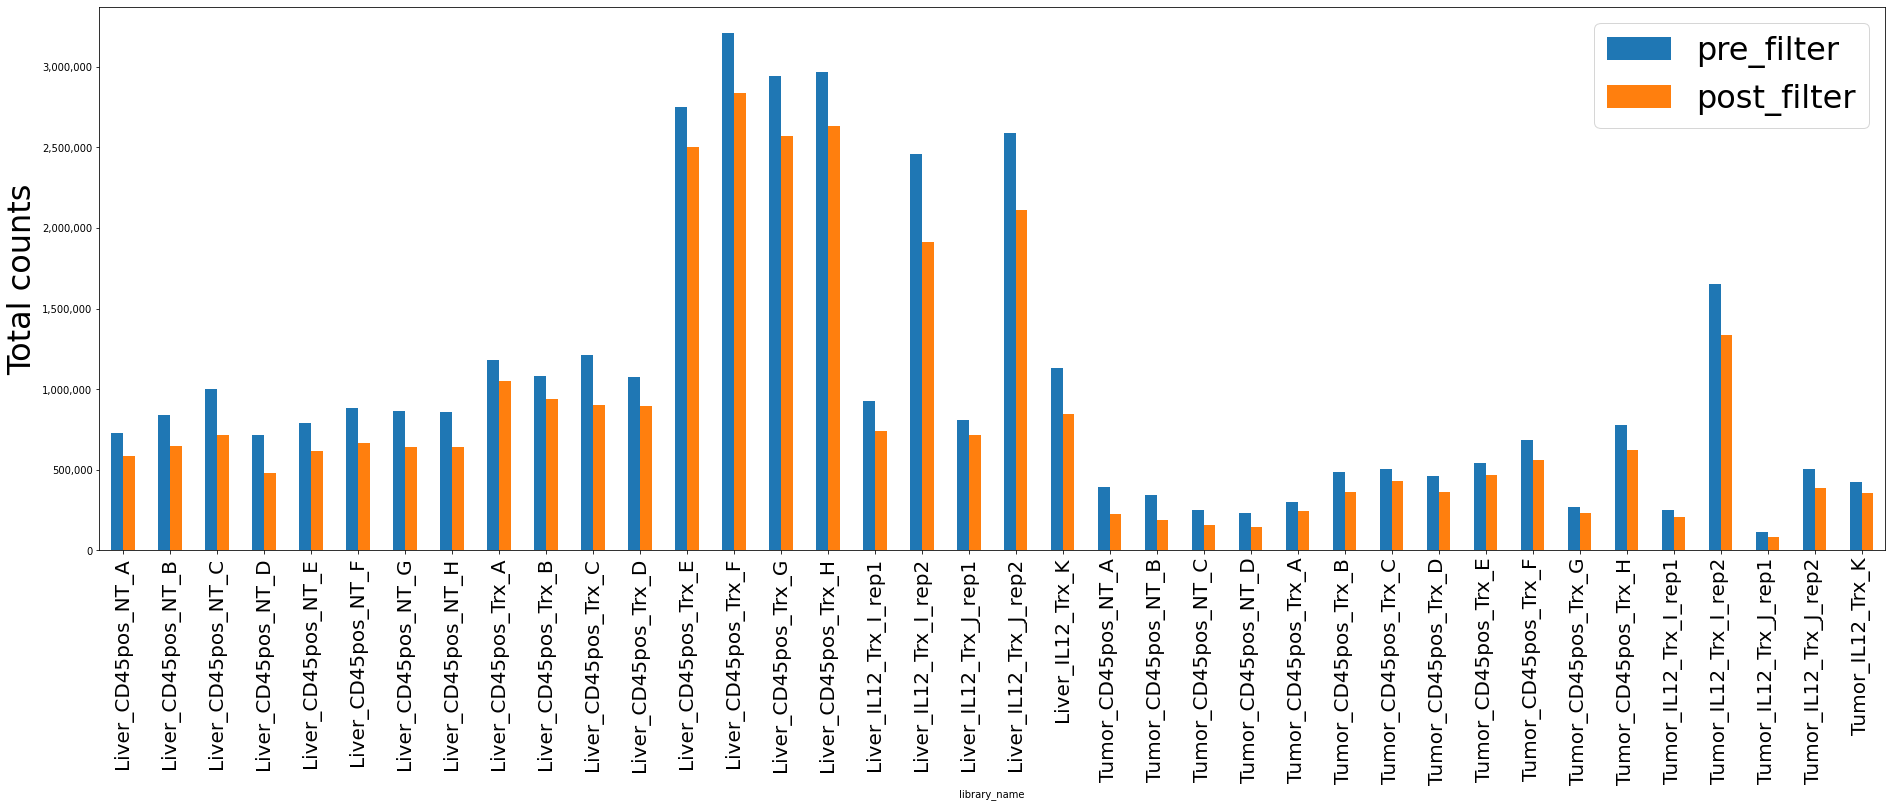

In [124]:
pd.DataFrame({'pre_filter' : pd.concat([adict[batch].obs for batch in batches]).groupby('library_name').agg('sum').n_counts.values,
              'post_filter' : pd.concat([fdict[batch].obs for batch in batches]).groupby('library_name').agg('sum').n_counts.values}, index=counts_per_library.index).plot.bar()
plt.gcf().set_size_inches(32,10)

ax = plt.gca()

ax.set_xticklabels(plt.gca().get_xticklabels(), size=20)
ax.set_ylabel('Total counts', fontsize=32)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



In [ ]:
pd.DataFrame({'pre_filter' : pd.concat([adict[batch].obs for batch in batches]).groupby('library_name').agg('sum').n_counts.values,
              'post_filter' : pd.concat([fdict[batch].obs for batch in batches]).groupby('library_name').agg('sum').n_counts.values}, index=counts_per_library.index).plot.bar()
plt.gcf().set_size_inches(32,10)

ax = plt.gca()

ax.set_xticklabels(plt.gca().get_xticklabels(), size=20)
ax.set_ylabel('Total counts', fontsize=32)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



# Average counts across libraries (before and after filtering)

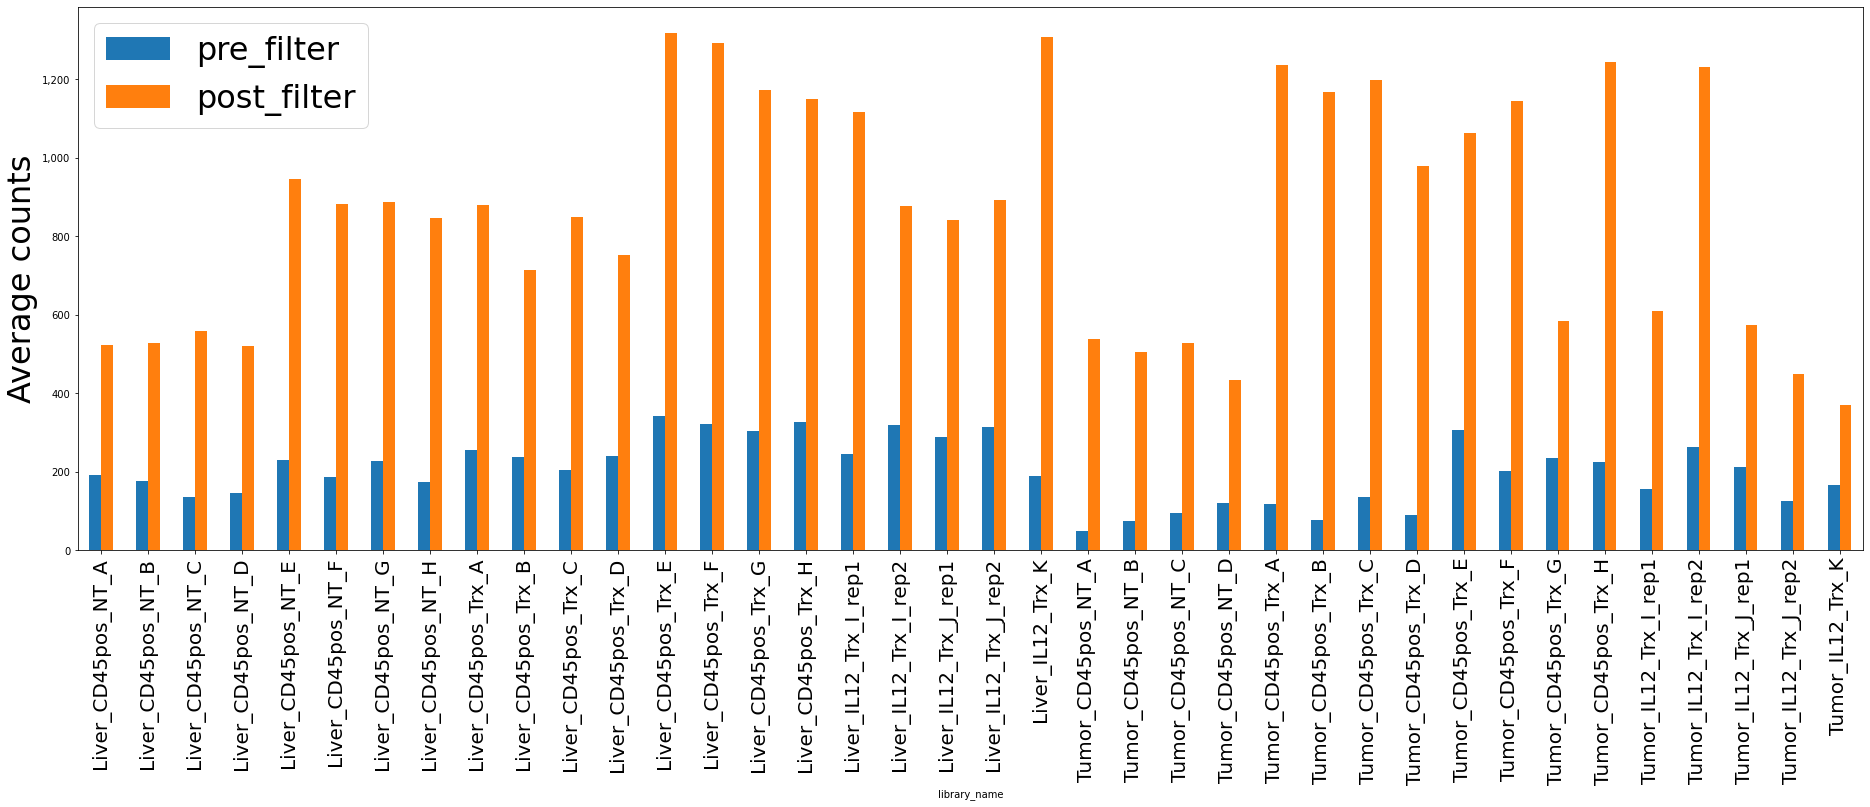

In [123]:
pd.DataFrame({'pre_filter' : pd.concat([adict[batch].obs for batch in batches]).groupby('library_name').agg('mean').n_counts.values,
              'post_filter' : pd.concat([fdict[batch].obs for batch in batches]).groupby('library_name').agg('mean').n_counts.values}, index=counts_per_library.index).plot.bar()
plt.gcf().set_size_inches(32,10)

ax = plt.gca()

ax.set_xticklabels(plt.gca().get_xticklabels(), size=20)
ax.set_ylabel('Average counts', fontsize=32)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



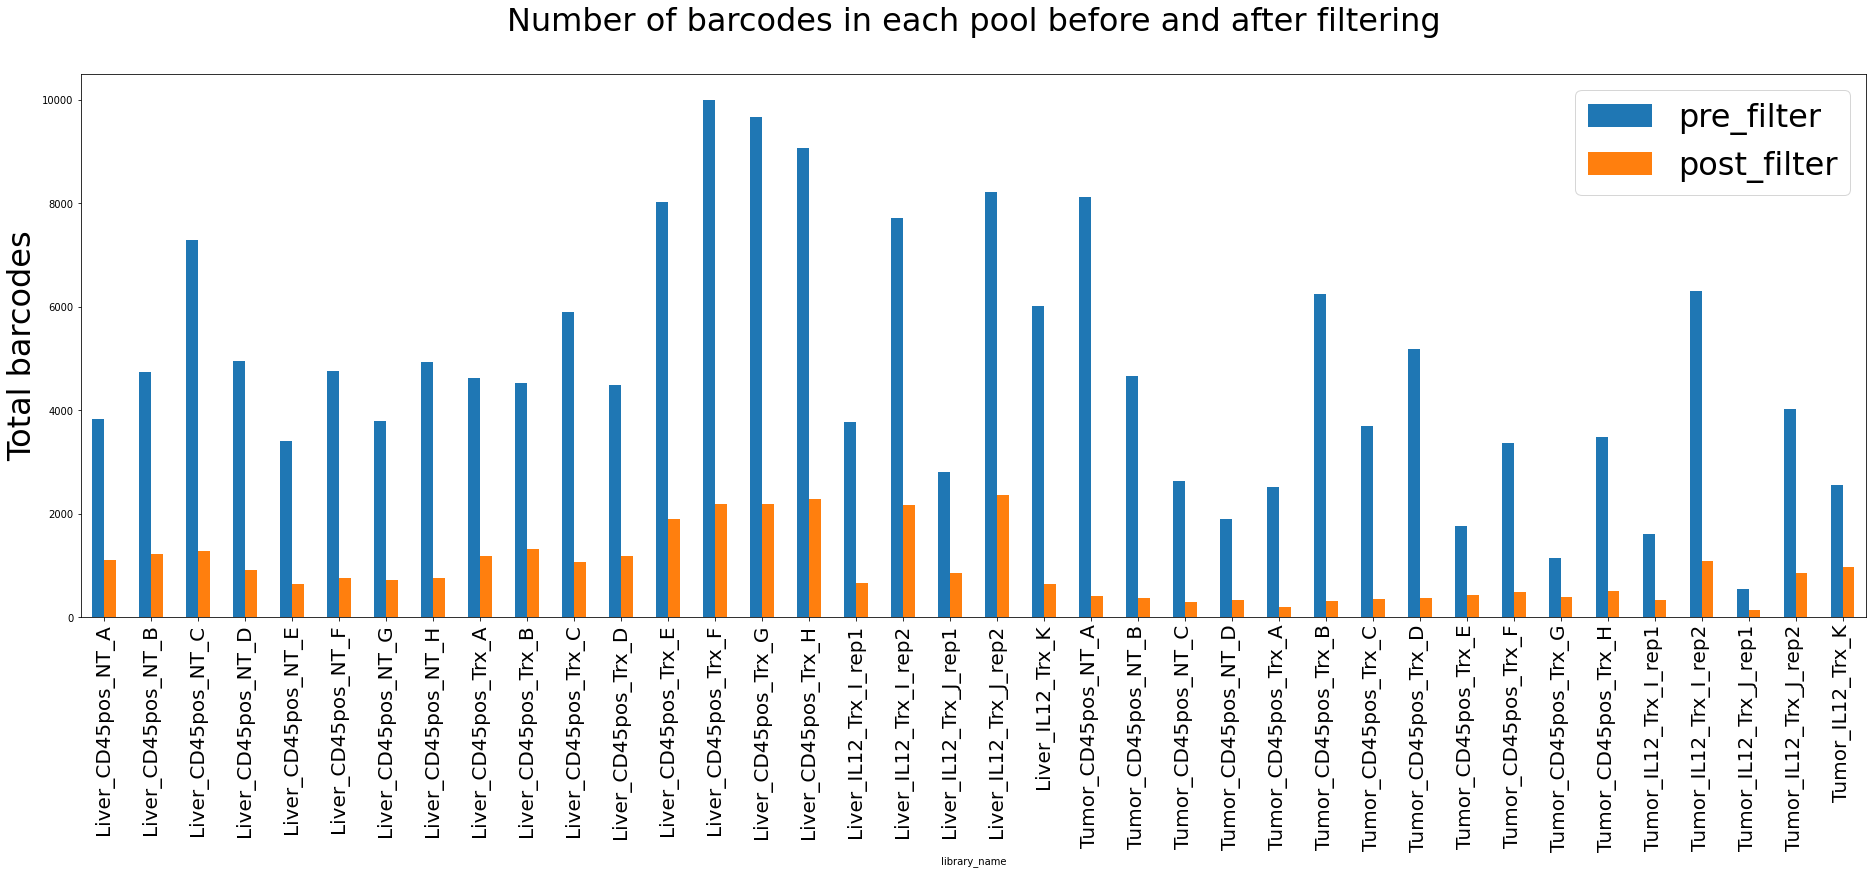

In [133]:
pd.DataFrame({'pre_filter' : pd.concat([adict[batch].obs for batch in batches]).groupby('library_name').count().iloc[:,0],
              'post_filter' : pd.concat([fdict[batch].obs for batch in batches]).groupby('library_name').count().iloc[:,0]}, index=counts_per_library.index).plot.bar()


plt.gcf().set_size_inches(32,10)

ax = plt.gca()

ax.set_xticklabels(plt.gca().get_xticklabels(), size=20)
#ax.set_yticklabels(plt.gca().get_yticklabels(), size=30)
ax.set_ylabel('Total barcodes', fontsize=32)

plt.legend(fontsize=32)


#ax.set_legend(fontsize=32)



#plt.gcf().set_figsize((16,16))
#plt.gca().set_yticks(np.linspace(0,1.5e7, 11))
plt.gca().set_title('Number of barcodes in each pool before and after filtering\n', fontsize=32)
plt.show()

In [42]:
pre_post_filter_obs = pd.concat([pd.concat([adict[batch].obs for batch in batches]).assign(filter = lambda x : 'pre_filter'),
          pd.concat([fdict[batch].obs for batch in batches]).assign(filter = lambda x : 'post_filter')])
#pd.DataFrame({'pre_filter' : pd.concat([adict[batch].obs for batch in batches]), 'post_filter' : pd.concat([fdict[batch].obs for batch in batches])})

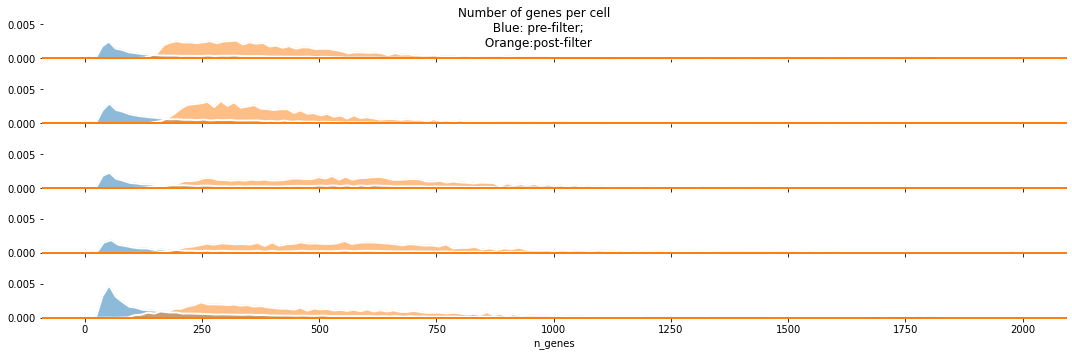

In [82]:
g = FacetGrid(pre_post_filter_obs, row="pool", hue="filter", aspect=15, height=1)

# Draw the densities in a few steps
g.map(kdeplot, "n_genes", clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.2)
g.map(kdeplot, "n_genes", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.text(0, .2, label, fontweight="bold", color=color,
    #        ha="left", va="center", transform=ax.transAxes)

g.map(label, "n_genes")

# Set the subplots to overlap
#g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.suptitle("Number of genes per cell \n Blue: pre-filter;\n Orange:post-filter")
plt.savefig('tmp.png')

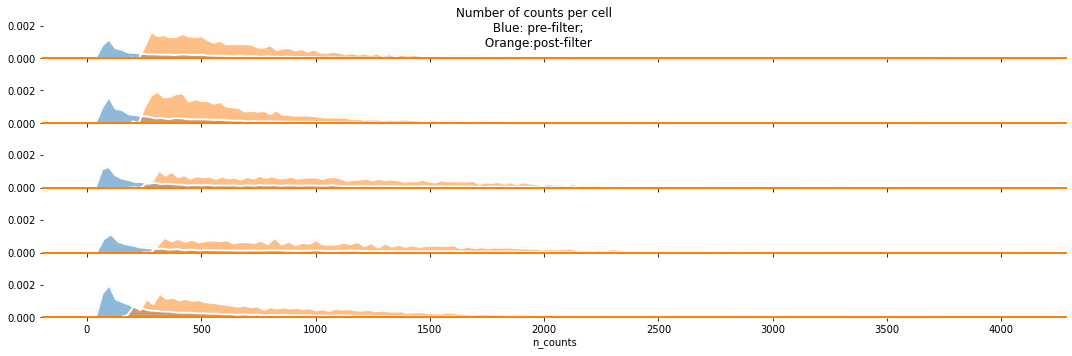

In [81]:
g = FacetGrid(pre_post_filter_obs, row="pool", hue="filter", aspect=15, height=1)

# Draw the densities in a few steps
g.map(kdeplot, "n_counts", clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.2)
g.map(kdeplot, "n_counts", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    #ax.text(0, .2, label, fontweight="bold", color=color,
    #        ha="left", va="center", transform=ax.transAxes)

g.map(label, "n_counts")

# Set the subplots to overlap
#g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.suptitle("Number of counts per cell \n Blue: pre-filter;\n Orange:post-filter")
plt.savefig('tmp.png')

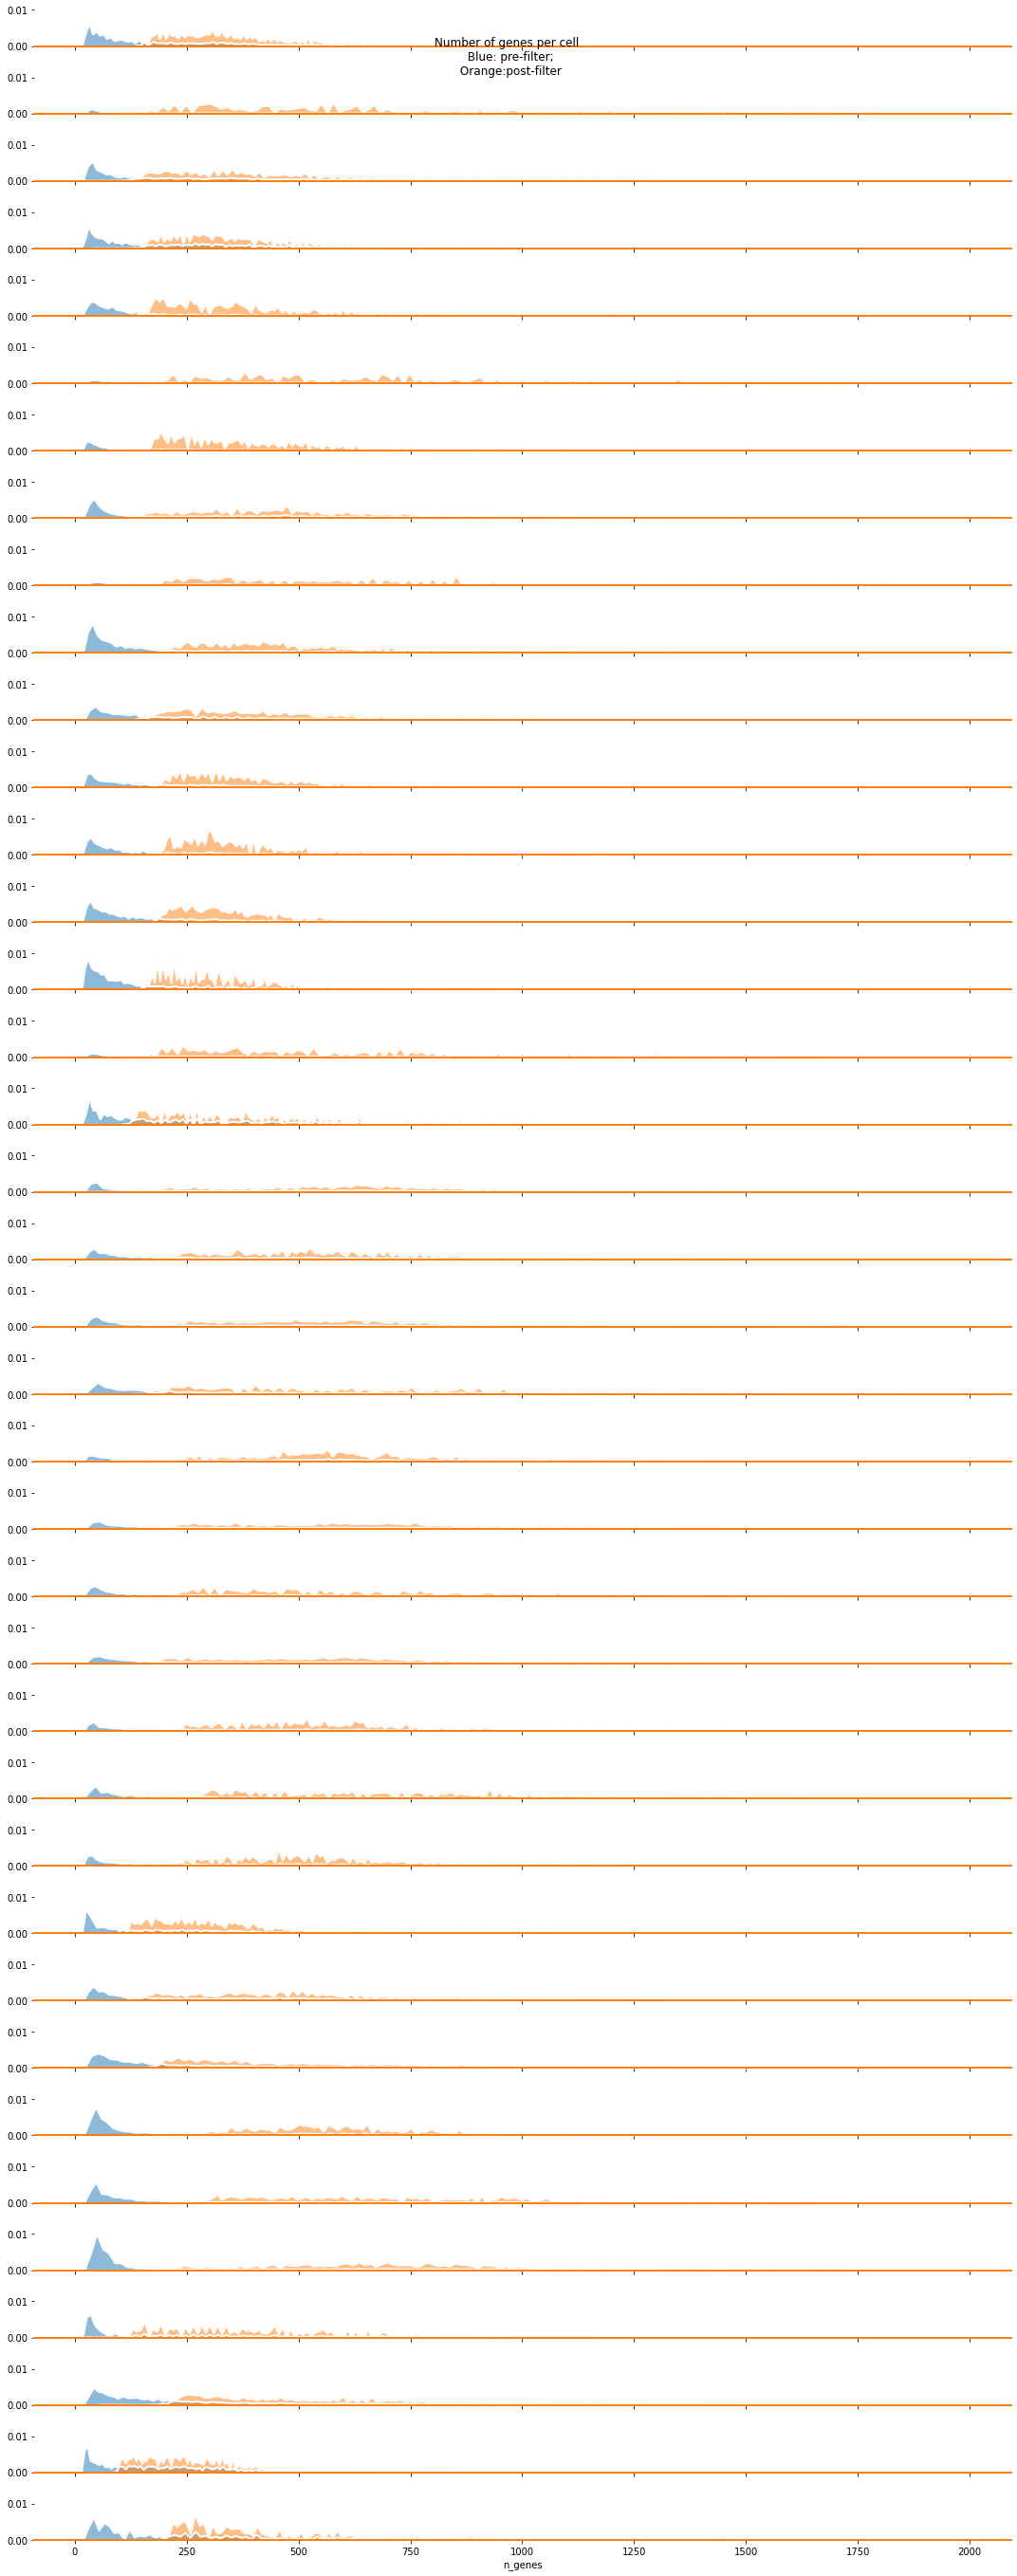

In [83]:
g = FacetGrid(pre_post_filter_obs, row="library_name", hue="filter", aspect=15, height=1)

# Draw the densities in a few steps
g.map(kdeplot, "n_genes", clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.2)
g.map(kdeplot, "n_genes", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "n_genes")

# Set the subplots to overlap
#g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.suptitle("Number of genes per cell \n Blue: pre-filter;\n Orange:post-filter")
plt.savefig('tmp.png')

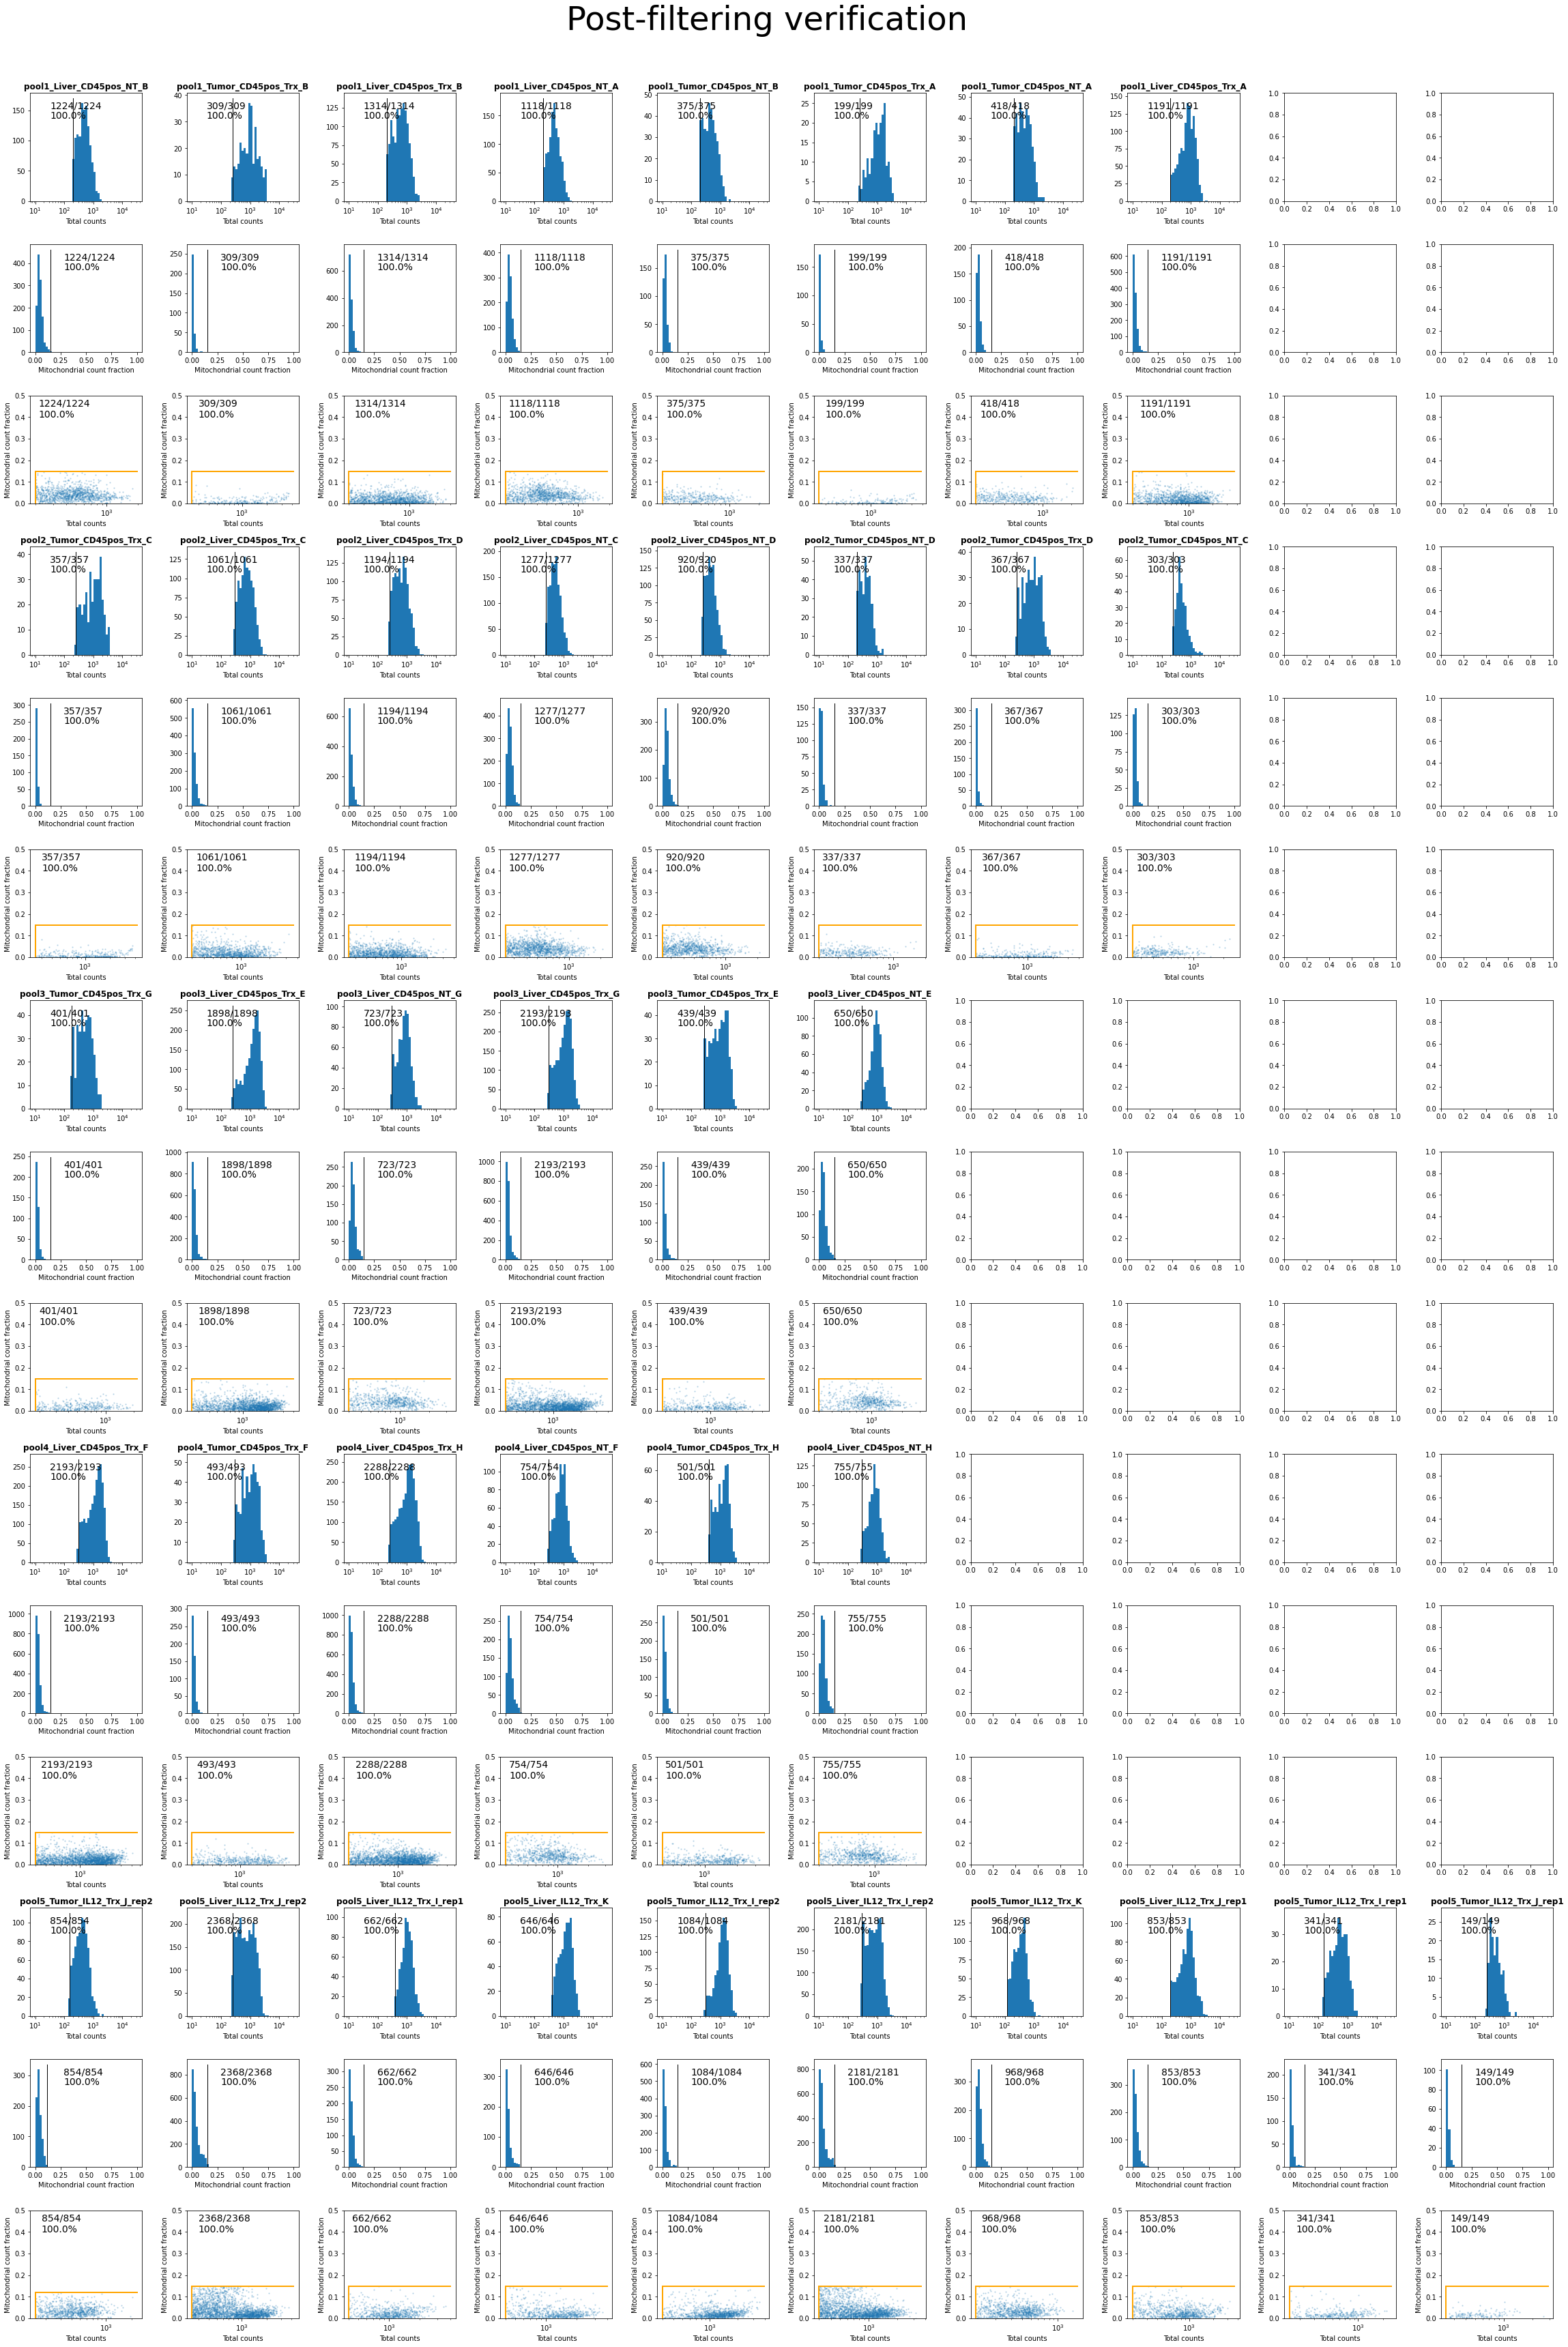

In [12]:
#wrap it into a function and have plots of the filtered data as part of the notebook


n_conditions_per_row = 10

fig, axes = plt.subplots(3*len(fdict.keys()), n_conditions_per_row, figsize=(4*n_conditions_per_row,12*len(fdict.keys())))
plt.suptitle('Post-filtering verification', fontsize=48, y=0.91)

batch_index = 0
for k in batches:

    #set barcode from file and match to respective library name
    
        #should I apply these filters?????
    #initial filter for mitochondrial fraction to be even computable
    #sc.pp.filter_cells(fdict[batch], min_genes=10)
    #sc.pp.filter_genes(fdict[batch], min_cells=3)

    
    # np.matrix.A1 is equivalent to np.matrix.asarray().flatten()
    #set observation annotation 'n_counts' as the (aggregated) sum over all genes for each observation/cell
    
    # for each sample, add the guessed total minimum as a global variable
    #min_tot = fdict[k].uns['min_tot']
    #max_mt = fdict[k].uns['max_mt']
    
    
    
    #plot histogram of n_counts per...
    
    for ax_col, condition in enumerate(fdict[k].obs['library_name'].unique()):
                
        #SECOND RUN: set manual thresholds
        min_tot, max_mt = filter_dict[condition]
        
        ax_row = batch_index*3
        
        #add percentage of mitochondrial genes as an annotation
        
        obs_condition = fdict[k].obs.query('library_name == {}'.format('"{}"'.format(condition)))
                        
        #
        #histogram 1
        #
        
        axes[ax_row, ax_col].hist(obs_condition.loc[:,'n_counts'], np.logspace(1, 4.5, 50))
        axes[ax_row, ax_col].set_xscale('log')
        axes[ax_row, ax_col].set_xlabel('Total counts')


        # set x1, y1 as lists containing the respective min, max for each axis as shown in the figure
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        

        #plot a line that goes from y_min to y_max at x = min_tot, where min_tot is the previously guessed universal minimum
        axes[ax_row, ax_col].plot([min_tot, min_tot], yl, c='black', linewidth=1)    

        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum(obs_condition.loc[:,'n_counts'] >= min_tot)

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + 10**(np.log10(xl.ptp())*0.3), yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + 10**(np.log10(xl.ptp())*0.3), yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)
    
    
        axes[ax_row, ax_col].set_title(k+'_'+condition, fontweight='bold')
        
        
        ax_row += 1
        
        
                #
        #histogram 2
        #
        
        axes[ax_row, ax_col].hist(obs_condition.loc[:,'mito_frac'], np.linspace(0, 1, 50))
        axes[ax_row, ax_col].set_xlabel('Mitochondrial count fraction')


        # set x1, y1 as lists containing the respective min, max for each axis as shown in the figure
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        

        #plot a line that goes from y_min to y_max at x = min_tot, where min_tot is the previously guessed universal minimum
        axes[ax_row, ax_col].plot([max_mt, max_mt], yl, c='black', linewidth=1)    

        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum(obs_condition.loc[:,'mito_frac'] <= max_mt)

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.3, yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.3, yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)
        
        ax_row += 1
        
        
        #scatter plot
        
        axes[ax_row, ax_col].scatter(obs_condition.loc[:,'n_counts'], obs_condition.loc[:,'mito_frac'], alpha=0.2, s = 2)
        
        axes[ax_row, ax_col].set_xscale('log')
        axes[ax_row, ax_col].set_ylim([0,0.5])
        axes[ax_row, ax_col].set_xlabel('Total counts')
        axes[ax_row, ax_col].set_ylabel('Mitochondrial count fraction')
        
        xl = np.array(axes[ax_row, ax_col].get_xlim())
        yl = np.array(axes[ax_row, ax_col].get_ylim())    
        
        
        axes[ax_row, ax_col].plot([min_tot, xl[1]], [max_mt, max_mt], c='orange', linewidth=2)    
        axes[ax_row, ax_col].plot([min_tot, min_tot], [yl[0], max_mt], c='orange', linewidth=2)    

        
        #total number of observations
        ntot = len(obs_condition.loc[:,'n_counts'])

        #number of observations which have more counts than the guessed minimum
        npass = sum((obs_condition.loc[:,'mito_frac'] <= max_mt ) & (obs_condition.loc[:,'n_counts'] >= min_tot))

        #plot the fraction of observations that pass the guessed minimum over total no. of observations; adjust to log10 scale
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.02, yl[0] + yl.ptp() * 0.9, '{}/{}'.format(npass, ntot), fontsize=14)
        axes[ax_row, ax_col].text(xl[0] + xl.ptp()*0.02, yl[0] + yl.ptp() * 0.8, '{:.1f}%'.format(npass/ntot*100), fontsize=14)

    batch_index += 1    

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Merge all pools into a single AnnData object: _adata_

In [13]:
adata = sc.AnnData.concatenate(*[fdict[batch] for batch in batches],
                                 batch_categories = batches,
                                 batch_key = 'pool')
#(*[adict_backup[s] for s in sample_name], 
#                               batch_categories=sample_name,
#                               batch_key='sample')

In [14]:
adata_liver = adata[adata.obs['tissue'] == 'liver']
adata_tumor = adata[adata.obs['tissue'] == 'tumor']

In [15]:
fdict['pool1'].obs

,barcode,library_name,n_genes,n_counts,mito_frac,tissue,marker,treatment,group,pool,min_tot,max_mt
48,AAACAAACAGAGGATAAGACACCA,Liver_CD45pos_NT_B,348,415.0,0.040964,Liver,CD45pos,NT,B,pool1,200,0.15
98,AAACAAACAGAGGATACAATACTT,Liver_CD45pos_NT_B,581,1069.0,0.005613,Liver,CD45pos,NT,B,pool1,200,0.15
237,AAACAAACAGAGGATAGGCCCTTA,Liver_CD45pos_NT_B,470,677.0,0.035451,Liver,CD45pos,NT,B,pool1,200,0.15
246,AAACAAACAGAGGATAGGGAGGTA,Liver_CD45pos_NT_B,374,500.0,0.018000,Liver,CD45pos,NT,B,pool1,200,0.15
342,AAACAAACAGAGGATATGGCTACC,Liver_CD45pos_NT_B,318,627.0,0.035088,Liver,CD45pos,NT,B,pool1,200,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...
1176778,TGTTATCAAGAGGATAGAGCGGTA,Liver_CD45pos_NT_B,233,262.0,0.022901,Liver,CD45pos,NT,B,pool1,200,0.15
1176919,TGTTATCAAGAGGATATGGGATTC,Liver_CD45pos_NT_B,433,552.0,0.056159,Liver,CD45pos,NT,B,pool1,200,0.15
1177673,TGTTATCAAGGCTTAGTGACGGAC,Liver_CD45pos_Trx_B,595,979.0,0.046987,Liver,CD45pos,Trx,B,pool1,200,0.15
1177945,TGTTATCAATAGAGAGGCAGCATG,Liver_CD45pos_NT_A,199,235.0,0.017021,Liver,CD45pos,NT,A,pool1,200,0.15


# Save part 1 results in backup folder, including dimensions and time stamp

In [16]:
!mkdir -p backups

start = time()
adata.write('backups/tox_marie_filtered_merged_{}x{}_backup_{}.h5ad'.format(*adata.shape,rz.now()))

print(time()-start)

start = time()
rz.save_df(adata.obs, 'backups/tox_marie_filtered_merged_meta_{}x{}_{}'.format(*adata.obs.shape, rz.now()))
print(time()-start)



... storing 'barcode' as categorical
... storing 'group' as categorical
... storing 'library_name' as categorical
... storing 'marker' as categorical
... storing 'tissue' as categorical
... storing 'treatment' as categorical


2.5560593605041504
0.37749552726745605


In [17]:
rz.now()

'200404_17h27'